### Problem statement 

Dataco is an Ecommerce platform selling sporting goods and accessories across the world. E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. The machine learning models built by us, will enable E-commerce and Goods/products delivery industries to identify the 'risk of late delivery' and predict the fastest and normal duration of goods shipment for their Inland and foreign clients/ customers/buyers.


This is the dataset of Supply Chains used by the company DataaCo Global which includes a collection of their products sold, finacial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 180,520 customers spanning to 53 columns related to Clothing , Sports,and Electronic Supplies.

It represents the sale of sporting goods across the world in different regions such as Africa, Europe, LATAM, US and Asia. The data represents the time period for 4years ie, 2015 to 2018.


# Objective

Building a regression model to predoict Sales;

Building a Binary Classification model to classify orders with high probabilty of late delivery (Late Delivery Risk analyser).


## Data Dictionary: Fields	Description

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# import function to perform feature selection
from sklearn.feature_selection import RFE
plt.rcParams["figure.figsize"] = (15,10)

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [2]:
#!pip install pycaret

In [2]:
df=pd.read_csv('data_supplychain.csv',encoding='latin-1')

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.000000,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.040000,180517,327.750000,0.290000,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.000000,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.050000,179254,327.750000,-0.800000,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.000000,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.060000,179253,327.750000,-0.800000,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.000000,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.070000,179252,327.750000,0.080000,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.000000,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.090000,179251,327.750000,0.450000,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class


In [4]:
df.shape

(180519, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


In [7]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.000000,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.040000,180517,327.750000,0.290000,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.000000,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.050000,179254,327.750000,-0.800000,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.000000,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.060000,179253,327.750000,-0.800000,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.000000,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.070000,179252,327.750000,0.080000,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.000000,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.090000,179251,327.750000,0.450000,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class


In [8]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

In [9]:
#target variable for classification 
df['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [10]:
#target variable for liner regression
df['Sales'].head()

0   327.750000
1   327.750000
2   327.750000
3   327.750000
4   327.750000
Name: Sales, dtype: float64

In [11]:
dfn= df.drop(['Category Id','Customer Email','Customer Fname', 'Customer Id', 
             'Customer Lname', 'Customer Password','Department Id','Order Customer Id','Order Id','Order Item Cardprod Id',
              'Customer Zipcode','Order Zipcode','Product Card Id', 'Product Category Id', 'Product Description', 'Product Image'], axis=1)


In [12]:
dfn.shape

(180519, 37)

# Checking and removing duplicates

In [13]:
dfn.duplicated().sum()

0

# Check and impute missing values 

In [14]:
dfn.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Ord

In [15]:
#replacing space with '_' for all column names
dfn.columns=dfn.columns.str.replace(' ','_')

In [16]:
dfn.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City', 'Order_Country', 'order_date_(DateOrders)', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'Product_Price', 'Product_Status', 'shipping_date_(DateOrders)', 'Shipping_Mode'], dtype='object')

## Univariate Analysis

In [17]:
dfn.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City', 'Order_Country', 'order_date_(DateOrders)', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'Product_Price', 'Product_Status', 'shipping_date_(DateOrders)', 'Shipping_Mode'], dtype='object')

In [18]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Days_for_shipping_(real),180519.000000,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days_for_shipment_(scheduled),180519.000000,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit_per_order,180519.000000,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales_per_customer,180519.000000,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.000000,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Latitude,180519.000000,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933
Longitude,180519.000000,-84.915675,21.433241,-158.025986,-98.446312,-76.847908,-66.370583,115.263077
Order_Item_Discount,180519.000000,20.664741,21.800901,0.000000,5.400000,14.000000,29.990000,500.000000
Order_Item_Discount_Rate,180519.000000,0.101668,0.070415,0.000000,0.040000,0.100000,0.160000,0.250000
Order_Item_Id,180519.000000,90260.000000,52111.490959,1.000000,45130.500000,90260.000000,135389.500000,180519.000000


In [19]:
#similar columns in the dataset except order_id
dfn.drop(['Order_Item_Id','Order_Item_Total','Order_Item_Product_Price','Order_Profit_Per_Order'], axis=1, inplace=True)

In [20]:
dfn['Product_Status'].value_counts()

0    180519
Name: Product_Status, dtype: int64

In [21]:
#insignifant feature : it has only 0 
dfn.drop(('Product_Status'), axis=1, inplace=True)

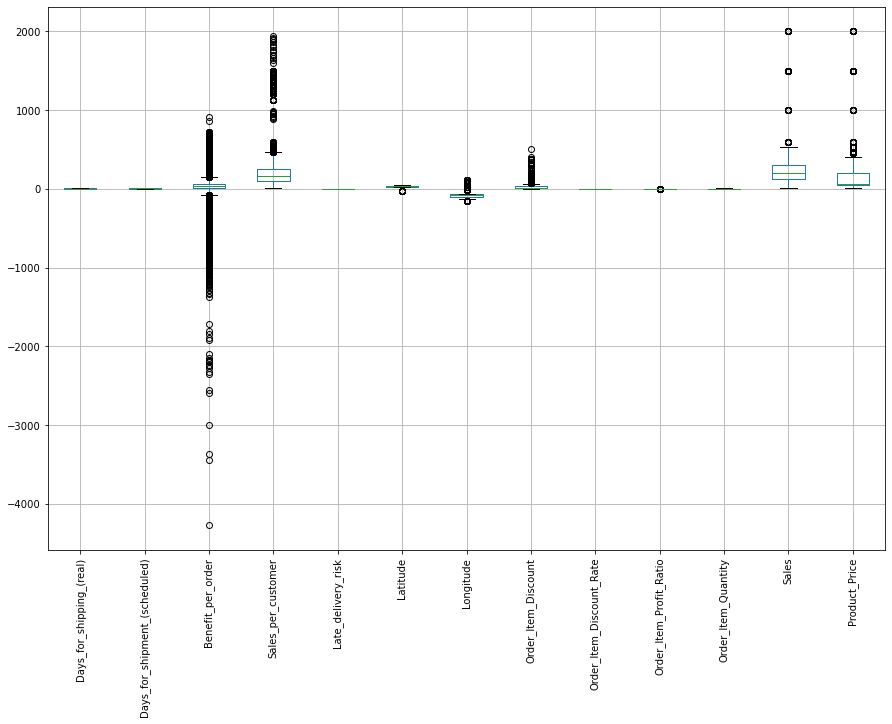

In [22]:
#outliers
plt.rcParams['figure.figsize']=(15,10)
dfn.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [23]:
#numarical variables
dfn_num=dfn.select_dtypes(include='number')

In [24]:
#categorical variables
dfn_cat=dfn.select_dtypes(include='object')

In [25]:
dfn.shape

(180519, 32)

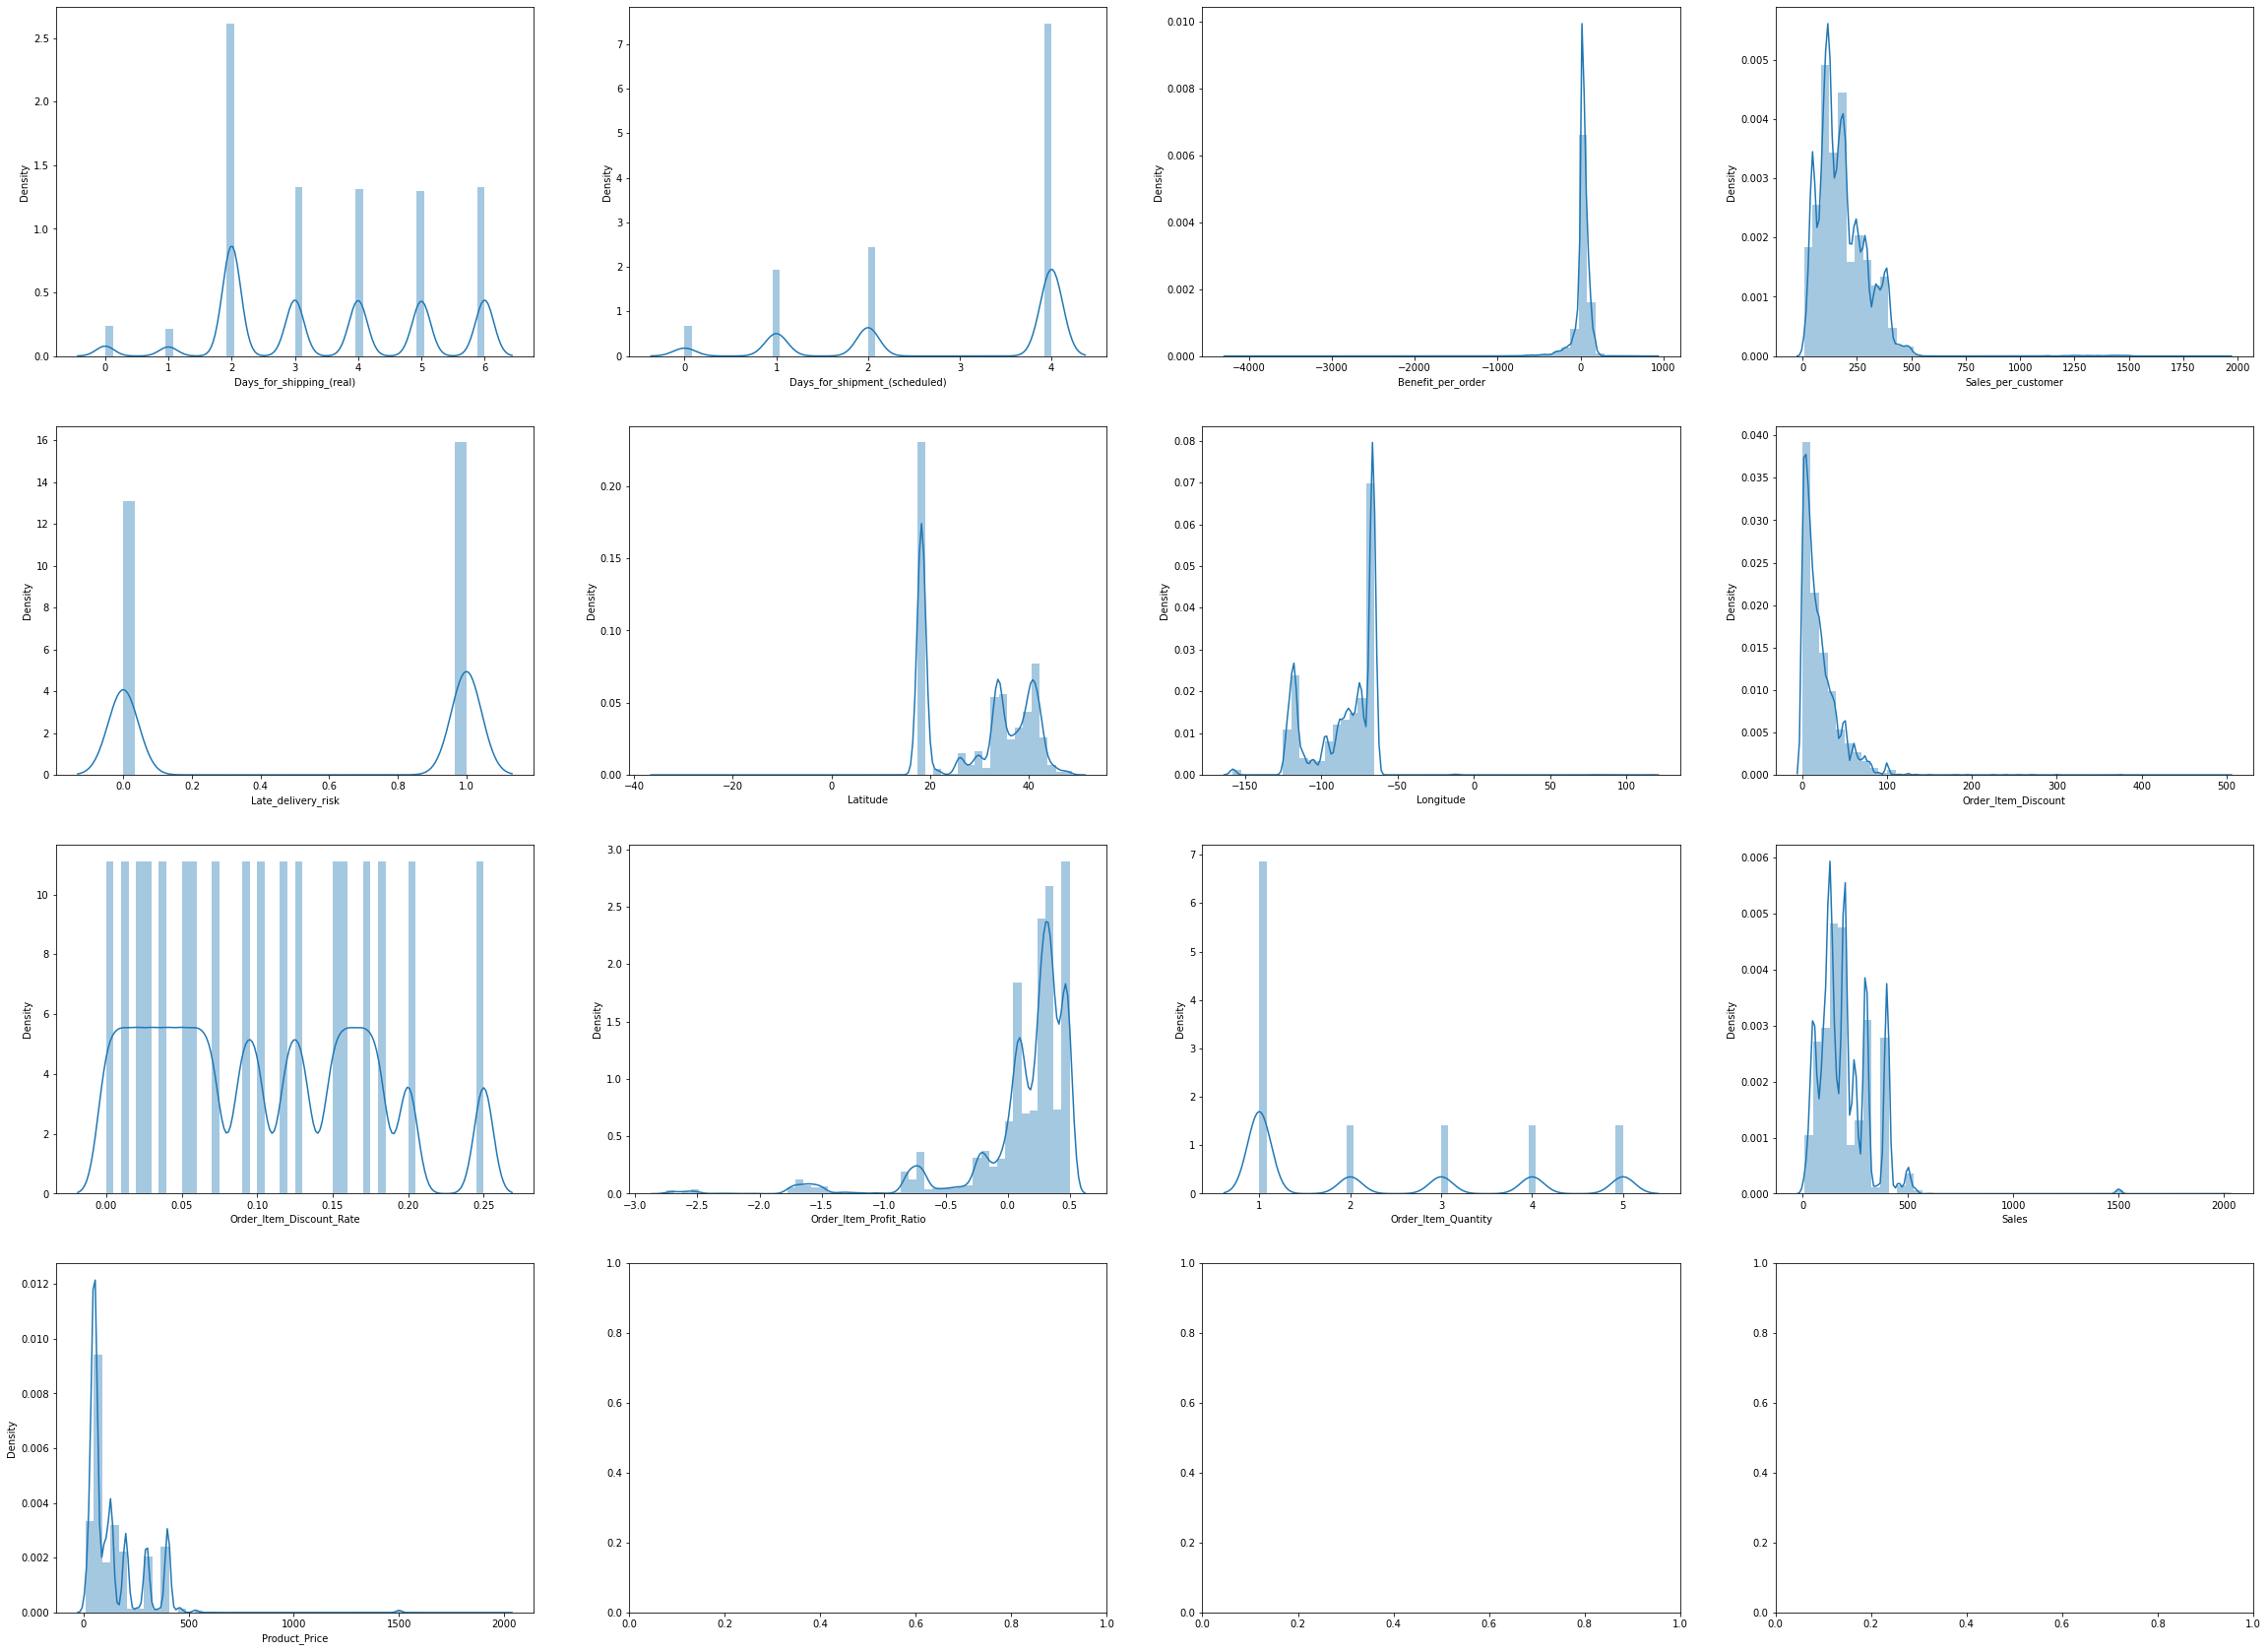

In [113]:
#distrubution of numarical variables
fig,ax = plt.subplots(nrows=4,ncols=4,figsize = (40,30))
for var,subplot in zip(dfn_num.columns,ax.flatten()):
    sns.distplot(dfn[var],ax = subplot)
plt.show()


# Conversion of numarical to categorical

In [26]:
dfn_num.columns

Index(['Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Benefit_per_order', 'Sales_per_customer', 'Late_delivery_risk', 'Latitude', 'Longitude', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales', 'Product_Price'], dtype='object')

In [27]:
#these are the encoded variables from categorical to numarical
num_cat= ['Days_for_shipping_(real)','Days_for_shipment_(scheduled)','Late_delivery_risk','Order_Item_Quantity']

In [28]:
#converting above variables to original data type
for i in num_cat:
    dfn[i]=dfn[i].astype('object')

In [29]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  object 
 2   Days_for_shipment_(scheduled)  180519 non-null  object 
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  object 
 7   Category_Name                  180519 non-null  object 
 8   Customer_City                  180519 non-null  object 
 9   Customer_Country               180519 non-null  object 
 10  Customer_Segment               180519 non-null  object 
 11  Customer_State                 180519 non-null  object 
 12  Customer_Street               

In [30]:
#data type conversion
dfn['order_date']=pd.to_datetime(dfn['order_date_(DateOrders)'])
dfn['shipping_date']=pd.to_datetime(dfn['shipping_date_(DateOrders)'])

In [31]:
dfn.drop(['order_date_(DateOrders)','shipping_date_(DateOrders)'],axis=1,inplace=True)

In [32]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days_for_shipping_(real)       180519 non-null  object        
 2   Days_for_shipment_(scheduled)  180519 non-null  object        
 3   Benefit_per_order              180519 non-null  float64       
 4   Sales_per_customer             180519 non-null  float64       
 5   Delivery_Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  object        
 7   Category_Name                  180519 non-null  object        
 8   Customer_City                  180519 non-null  object        
 9   Customer_Country               180519 non-null  object        
 10  Customer_Segment               180519 non-null  object        
 11  

In [33]:
dfn_cat=dfn.select_dtypes(include='object')

In [34]:
dfn_cat.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Market', 'Order_City', 'Order_Country', 'Order_Item_Quantity', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'Shipping_Mode'], dtype='object')

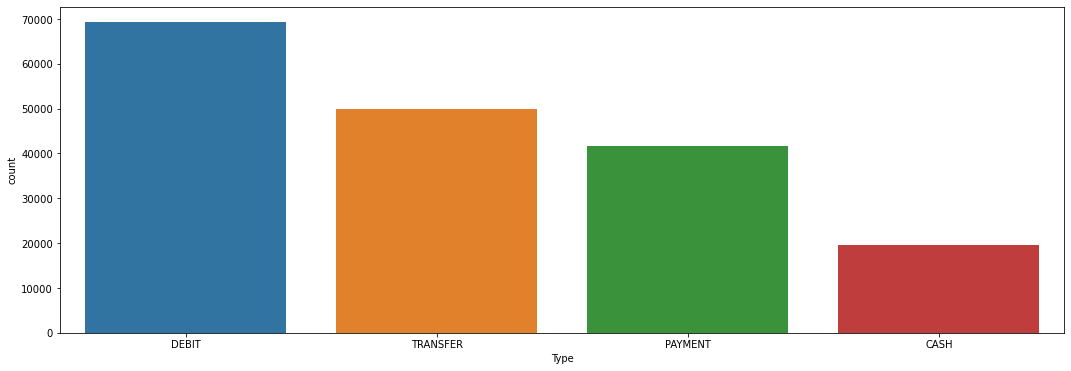

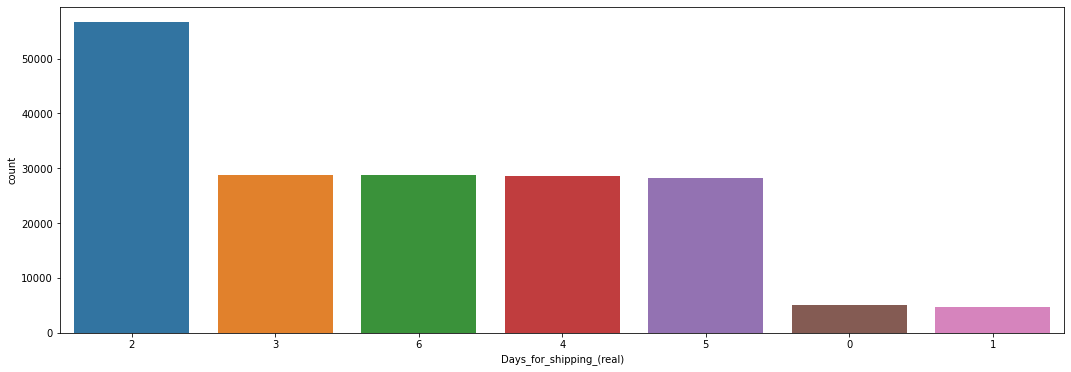

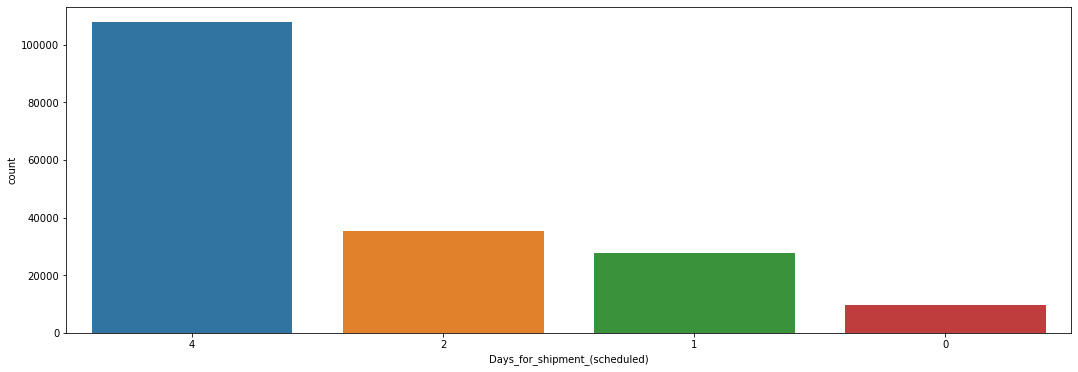

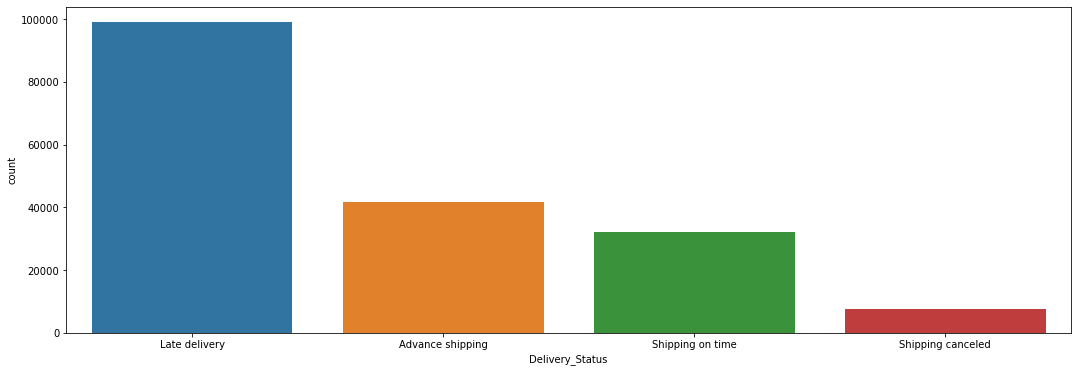

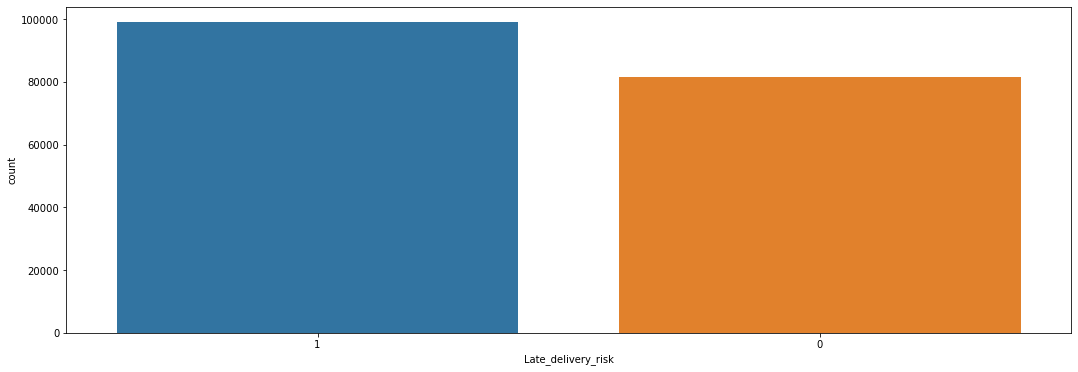

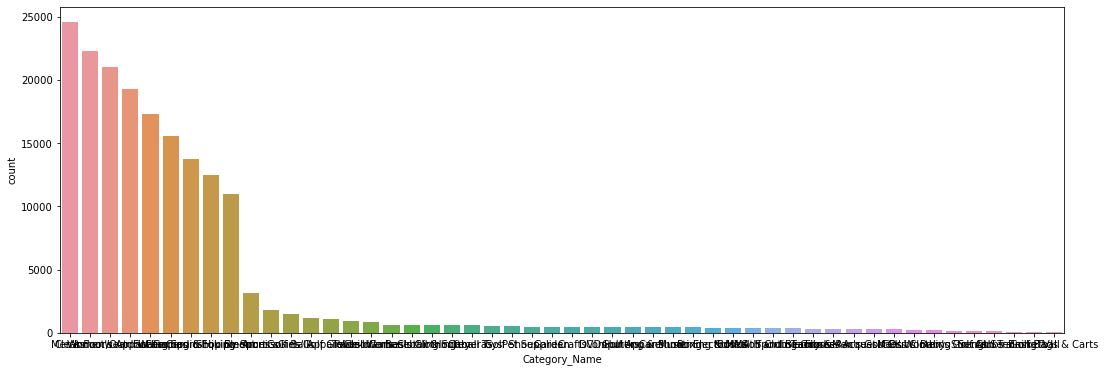

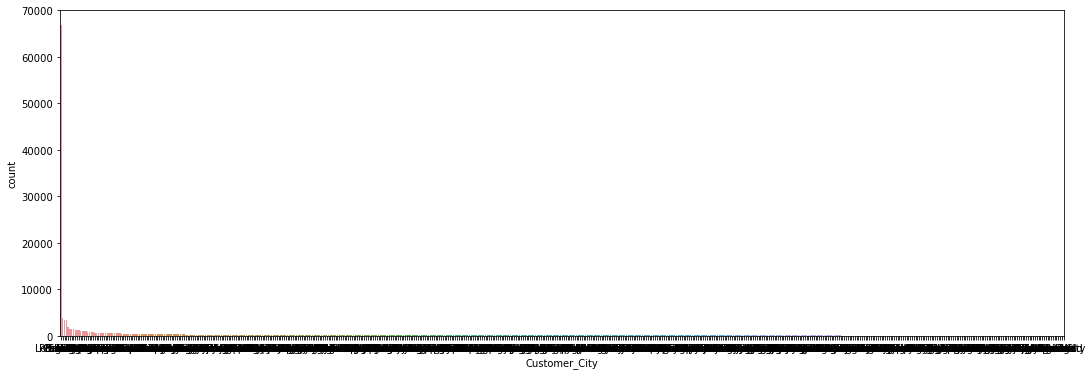

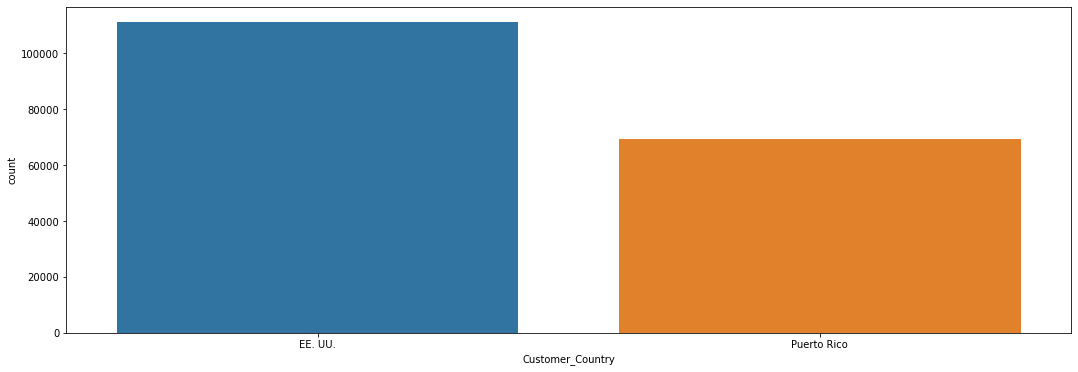

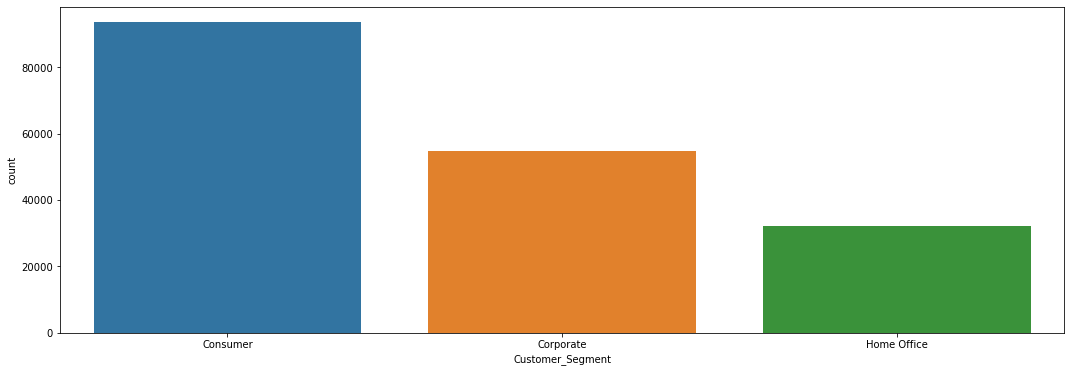

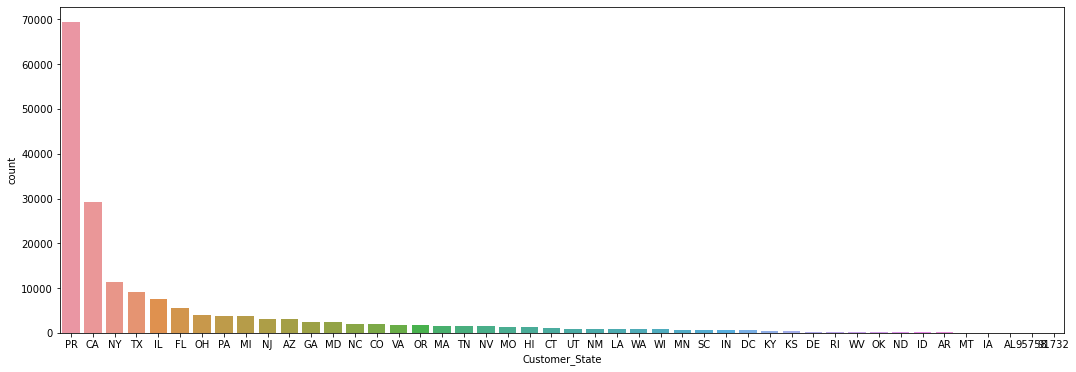

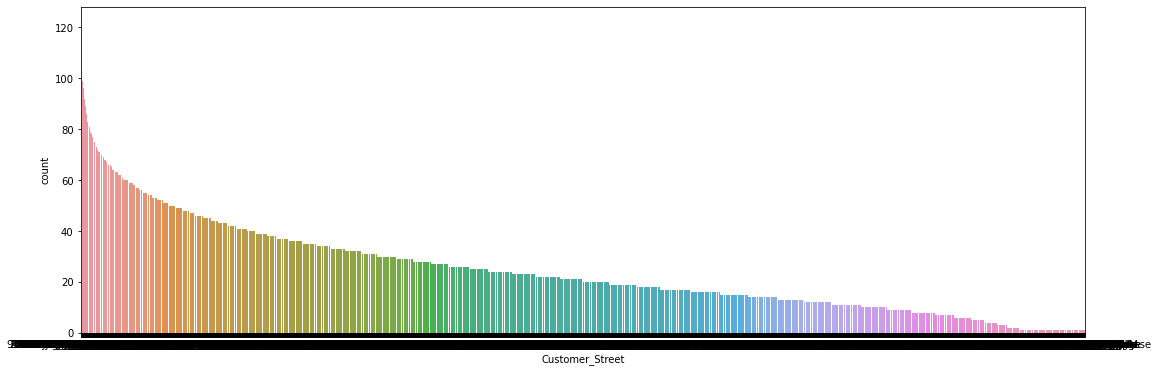

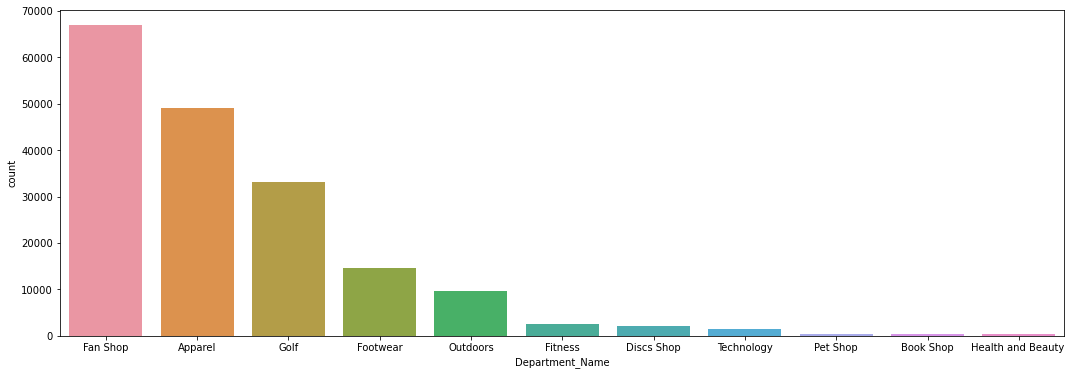

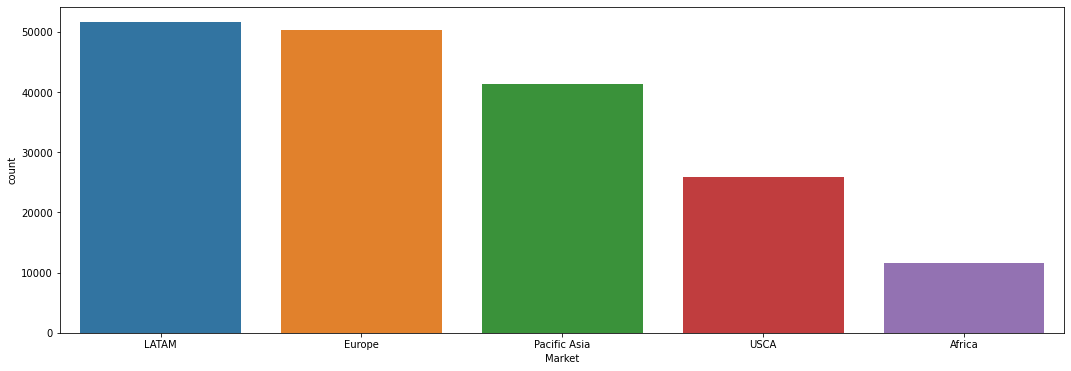

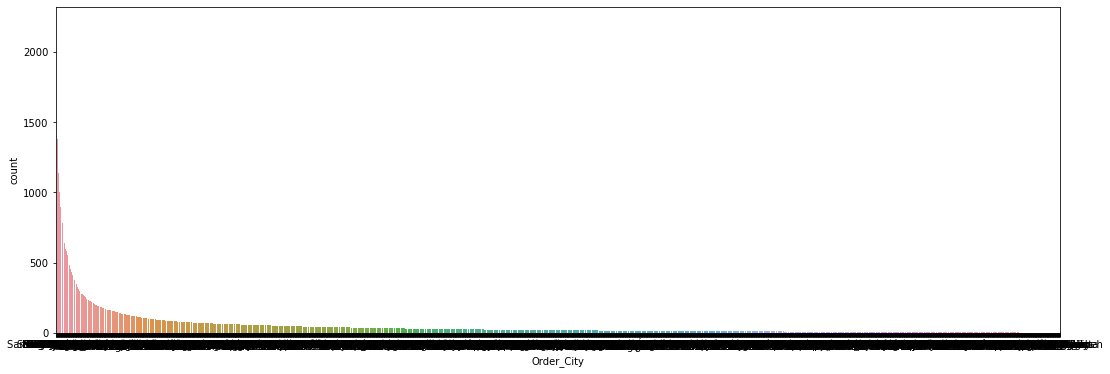

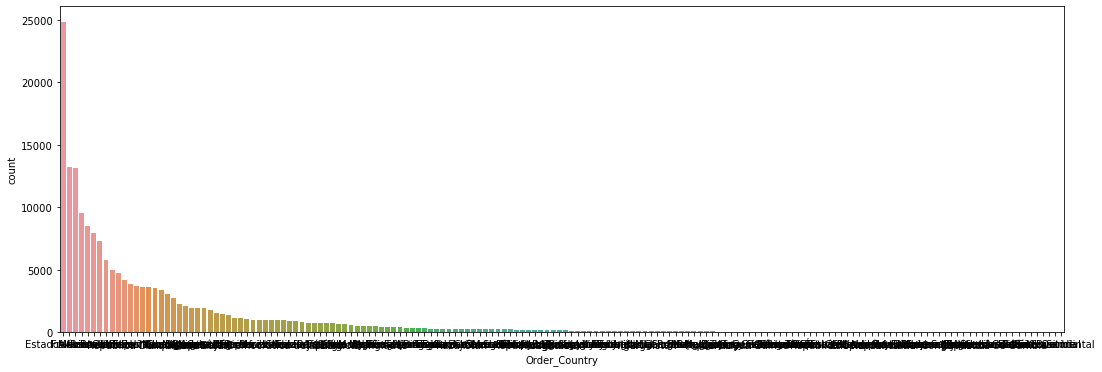

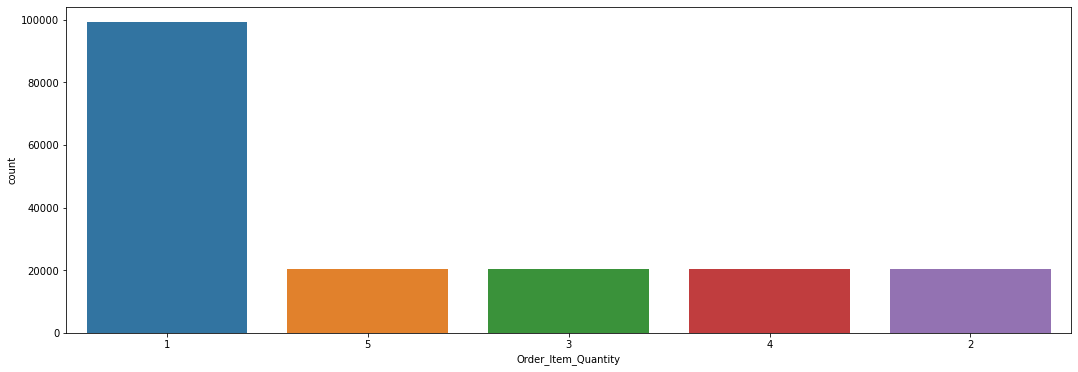

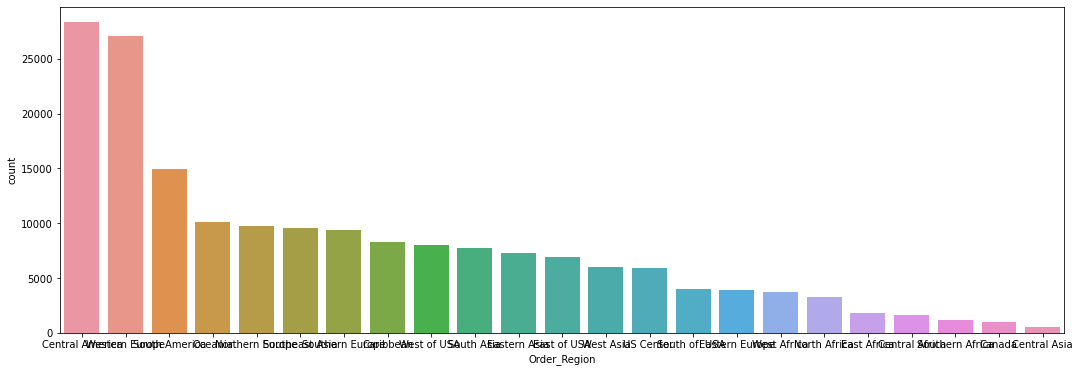

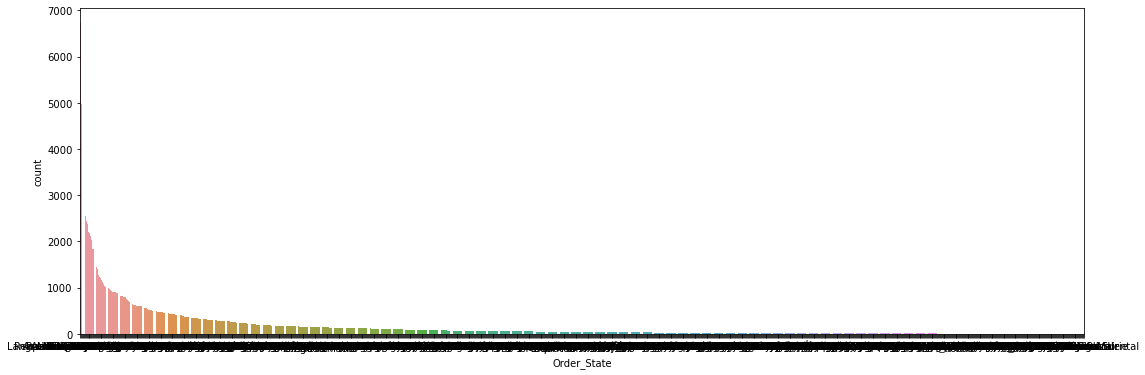

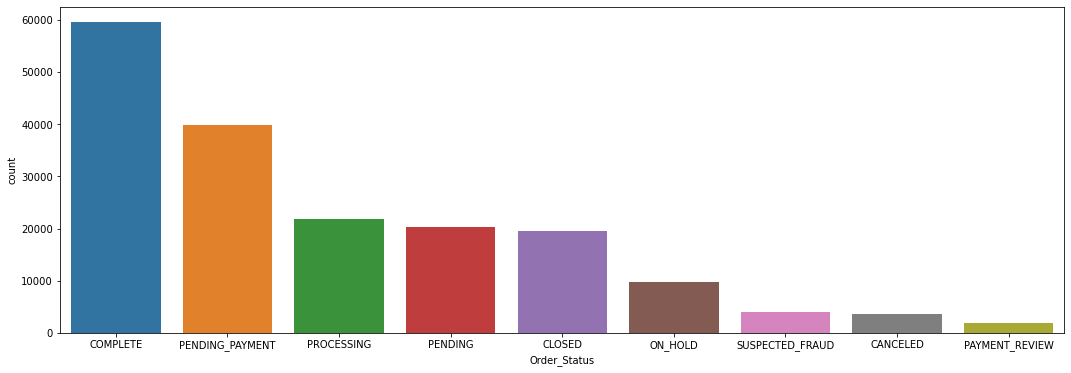

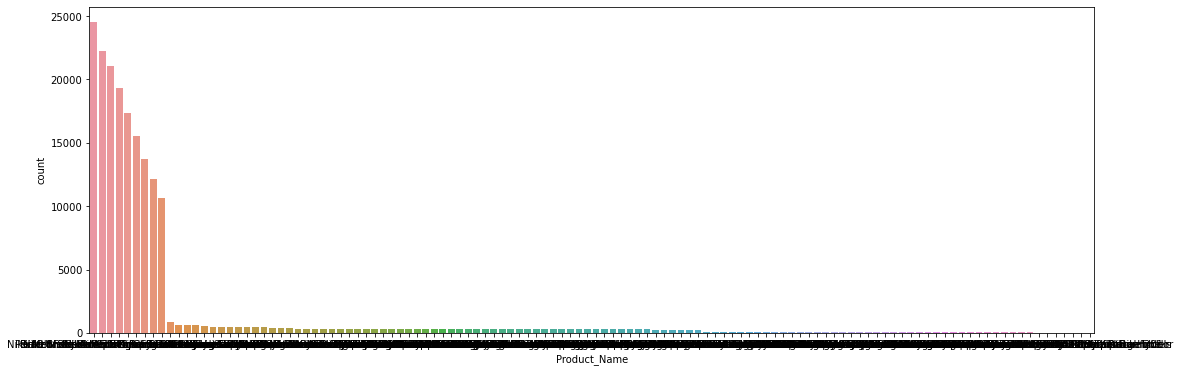

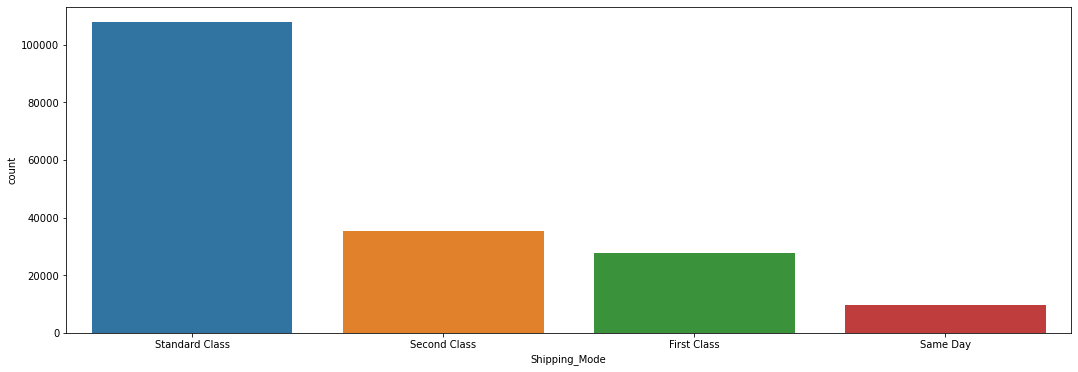

In [123]:
for c in dfn_cat:
    plt.figure(figsize=(18,6)) 
    sns.countplot(x =c,data = dfn_cat,order = dfn[c].value_counts().index) 

In [35]:
#top 10 products for inventory (stock)
dfn_cat.Product_Name.value_counts(ascending=False)[0:10]

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
Nike Men's Free 5.0+ Running Shoe                12169
Under Armour Girls' Toddler Spine Surge Runni    10617
Fighting video games                               838
Name: Product_Name, dtype: int64

In [36]:
dfn_cat.Order_Region.value_counts()

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order_Region, dtype: int64

## Bi-Variate Analysis

1. Numarical vs Numarical -------> Correlation matrix -- vis -- heatmap,pairplot and scatter plot

2. Numarical vs Categorical -----> Groupby, vis--Groupby boxplot,groupby density,groupby histogram

3. Categorical vs Categorical---->Crosstab or pivot table, vis--> groupby bar, stacked bar chart

4. Time vs Numarical ----> Line charts (line plot)

#### Numarical vs Numarical

In [37]:
dfn.corr()

,Benefit_per_order,Sales_per_customer,Latitude,Longitude,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Sales,Product_Price
Benefit_per_order,1.000000,0.133484,0.000338,-0.002521,0.064756,-0.018644,0.823689,0.131816,0.103459
Sales_per_customer,0.133484,1.000000,-0.000223,0.001444,0.498734,-0.119469,-0.001439,0.989744,0.781781
Latitude,0.000338,-0.000223,1.000000,-0.525122,-0.002997,-0.003889,-0.000081,-0.000696,0.000471
Longitude,-0.002521,0.001444,-0.525122,1.000000,0.002343,0.000526,-0.003582,0.001696,-0.000894
Order_Item_Discount,0.064756,0.498734,-0.002997,0.002343,1.000000,0.659955,-0.002788,0.617438,0.488101
Order_Item_Discount_Rate,-0.018644,-0.119469,-0.003889,0.000526,0.659955,1.000000,-0.002691,0.000346,0.000345
Order_Item_Profit_Ratio,0.823689,-0.001439,-0.000081,-0.003582,-0.002788,-0.002691,1.000000,-0.001766,-0.002043
Sales,0.131816,0.989744,-0.000696,0.001696,0.617438,0.000346,-0.001766,1.000000,0.789948
Product_Price,0.103459,0.781781,0.000471,-0.000894,0.488101,0.000345,-0.002043,0.789948,1.000000


<AxesSubplot:>

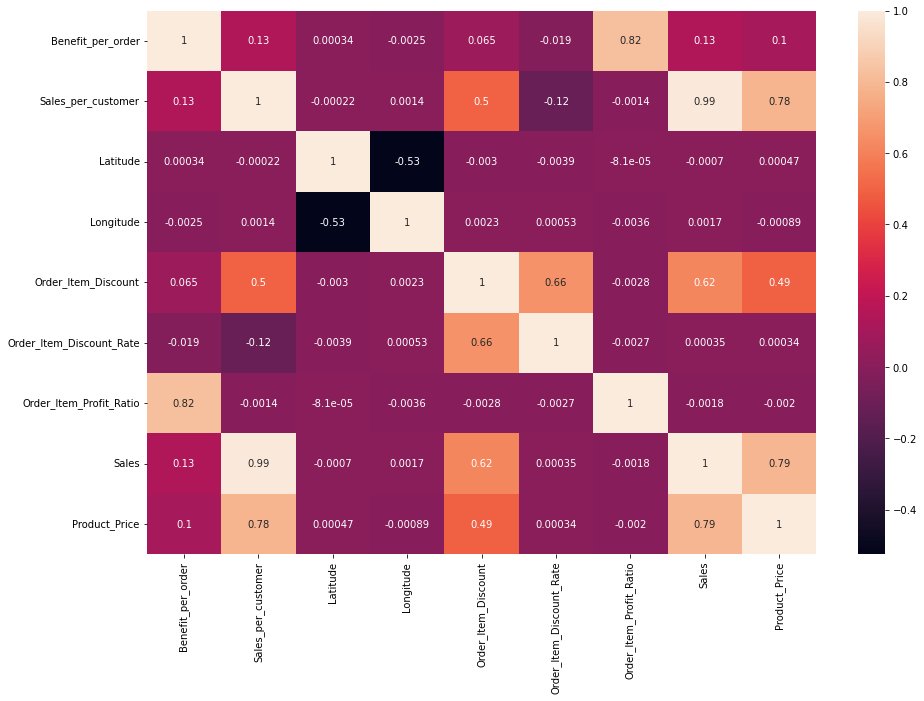

In [38]:
sns.heatmap(dfn.corr(),annot=True)

In [39]:
import scipy.stats as st

## correlation test b/w two numarical variables

In [40]:
st.pearsonr(dfn.Sales,dfn.Product_Price)

(0.7899482013113817, 0.0)

In [41]:
st.pearsonr(dfn.Sales,dfn.Benefit_per_order)

(0.1318155893367277, 0.0)

In [42]:
#p_value < 0.05 so it is significant

In [43]:
st.pearsonr(dfn.Sales,dfn.Order_Item_Discount_Rate)

(0.00034600208036779205, 0.8831267198471784)

In [44]:
#p_value > 0.05, no relationship and not signifant variable

To prove statistically b/w two numarical variables --> do correalation test based on p_value (if p_value less then 0.05: significant variable)

<AxesSubplot:xlabel='Order_Item_Profit_Ratio', ylabel='Sales'>

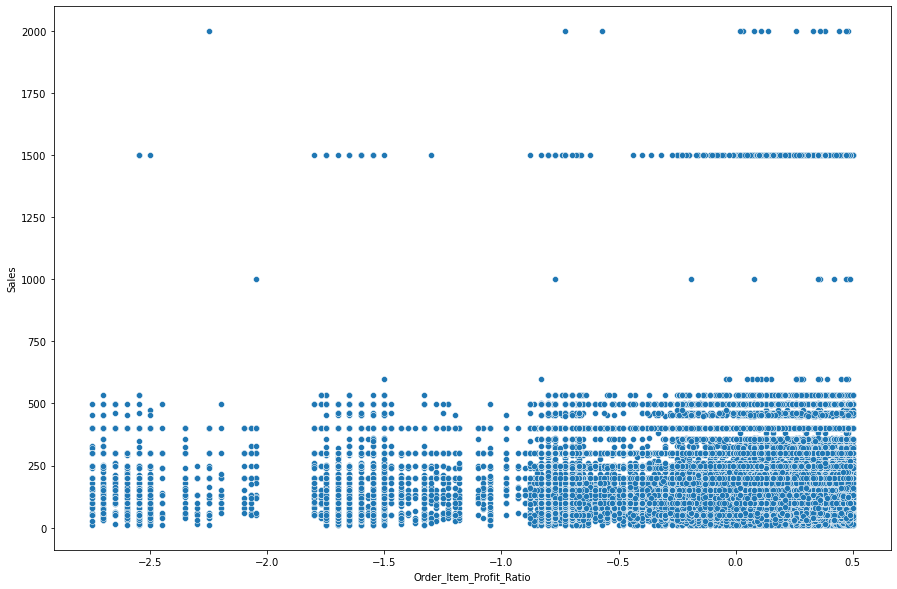

In [45]:
sns.scatterplot(dfn.Order_Item_Profit_Ratio,dfn.Sales)

In [46]:
#no relationship

<AxesSubplot:xlabel='Sales', ylabel='Order_Item_Discount'>

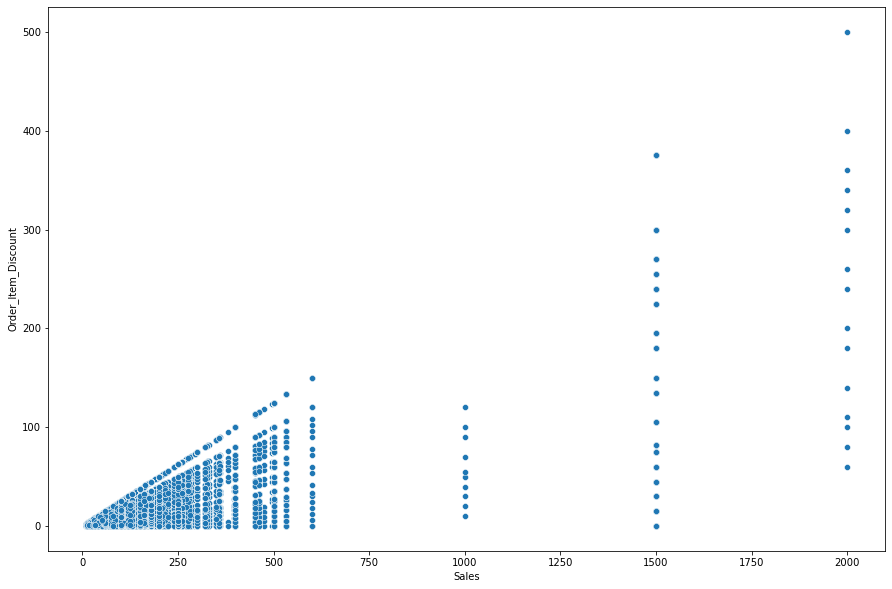

In [47]:
sns.scatterplot(dfn.Sales,dfn.Order_Item_Discount)

In [48]:
#positive correlation  

<AxesSubplot:xlabel='Sales', ylabel='Order_Item_Discount_Rate'>

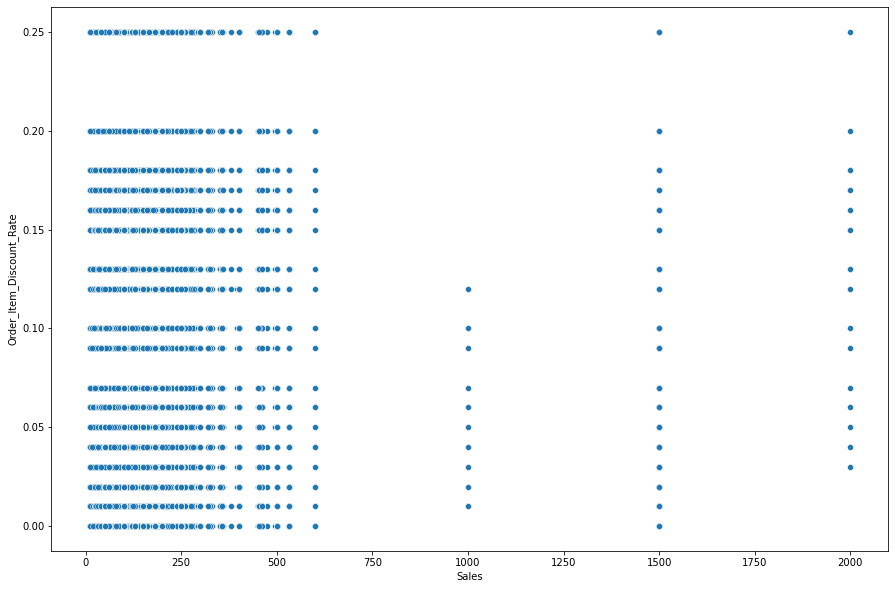

In [49]:
sns.scatterplot(dfn.Sales,dfn.Order_Item_Discount_Rate)

In [50]:
#no correlation but customers still buying

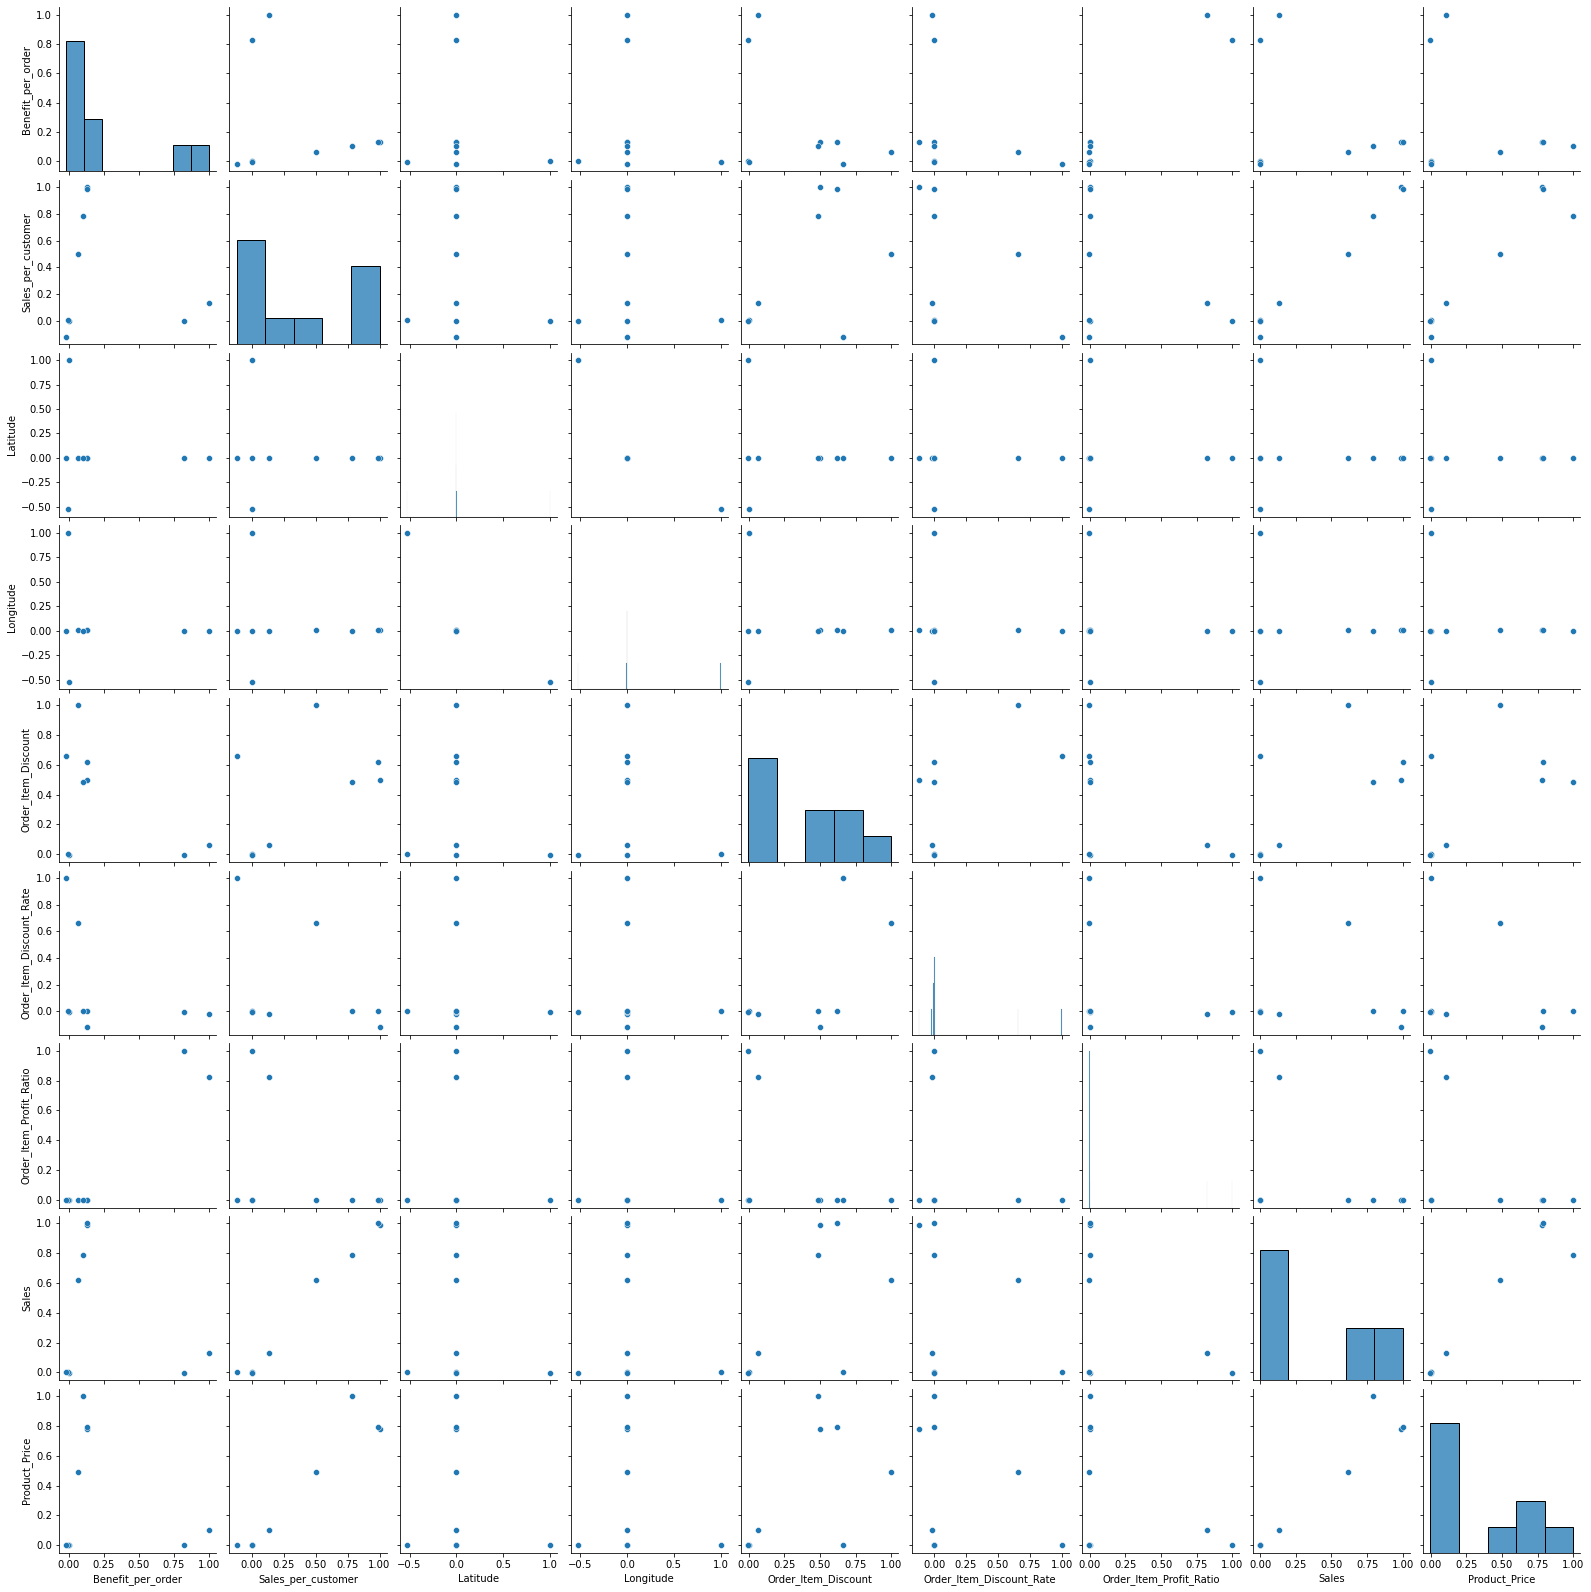

In [132]:
sns.pairplot(dfn.corr())

### Numarical vs Categorical

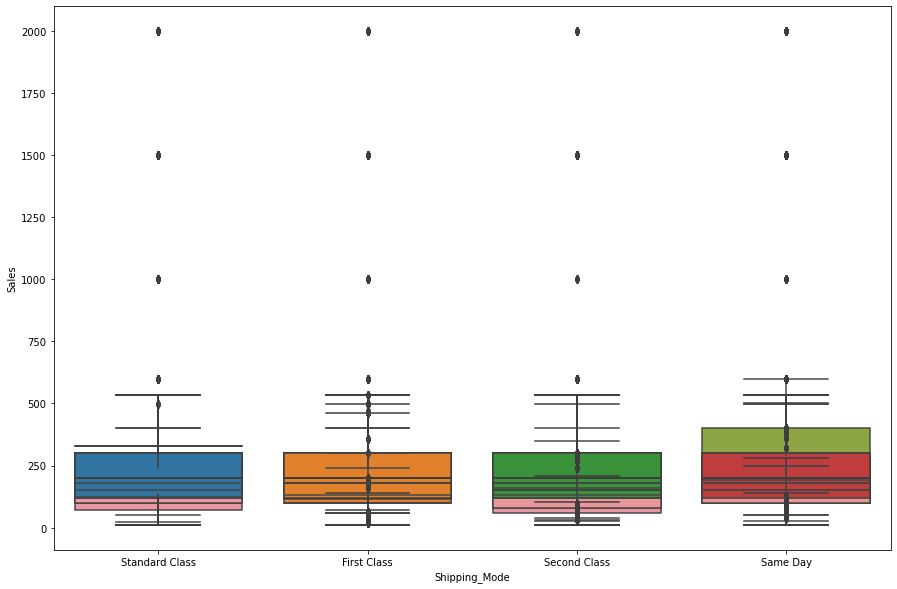

In [167]:
for i in dfn.select_dtypes(include='object').columns:
    sns.boxplot(dfn.select_dtypes(include='object')[i],dfn.Sales)
plt.show()

In [51]:
dfn_cat.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Market', 'Order_City', 'Order_Country', 'Order_Item_Quantity', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'Shipping_Mode'], dtype='object')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

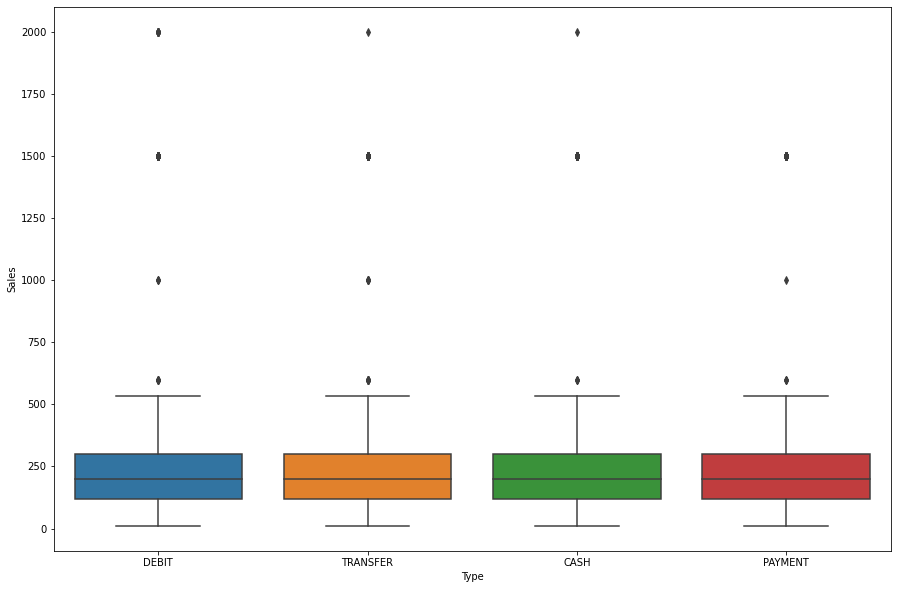

In [52]:
sns.boxplot(dfn.Type,dfn.Sales)

<AxesSubplot:xlabel='Delivery_Status', ylabel='Sales'>

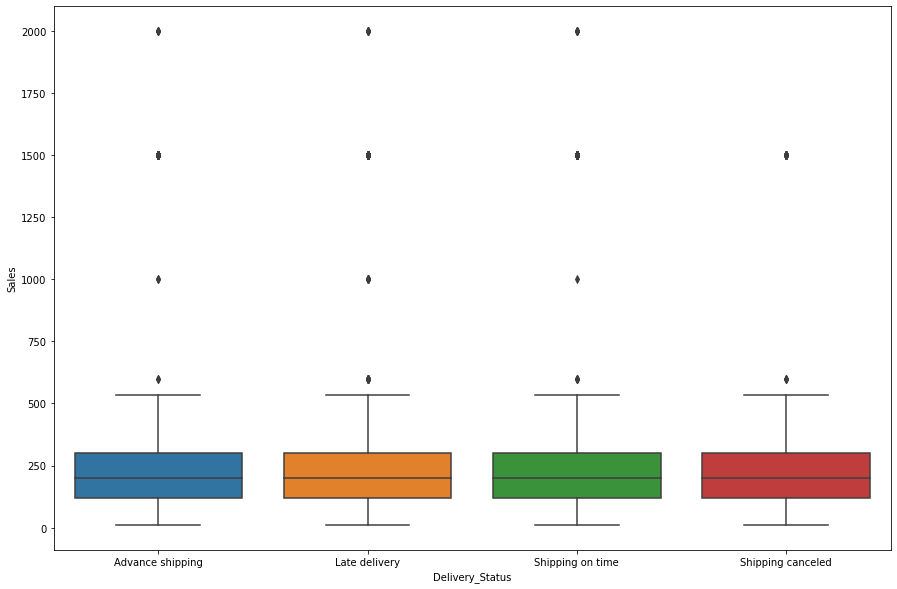

In [53]:
sns.boxplot(dfn.Delivery_Status,dfn.Sales)

<AxesSubplot:xlabel='Market', ylabel='Sales'>

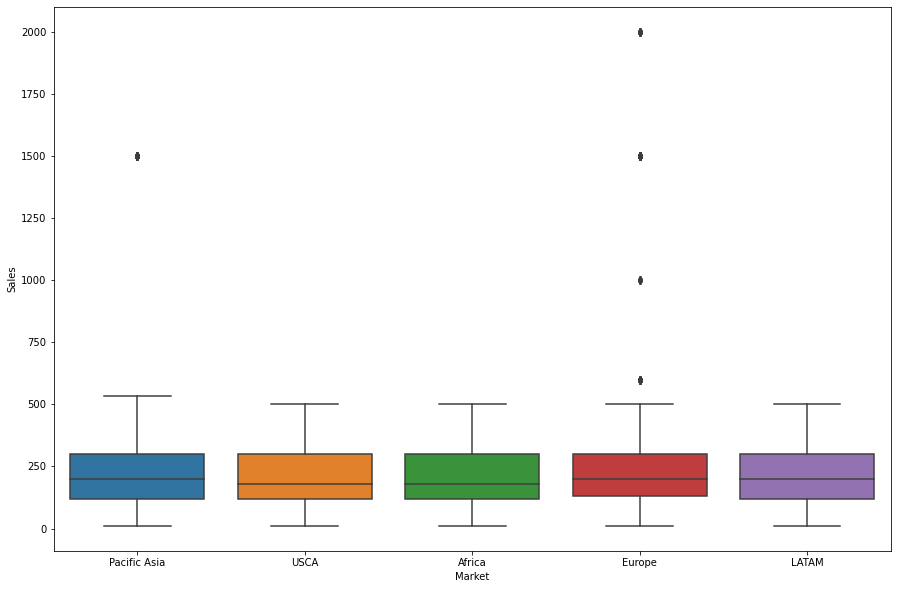

In [54]:
sns.boxplot(dfn.Market,dfn.Sales)

<AxesSubplot:xlabel='Customer_Segment', ylabel='Sales'>

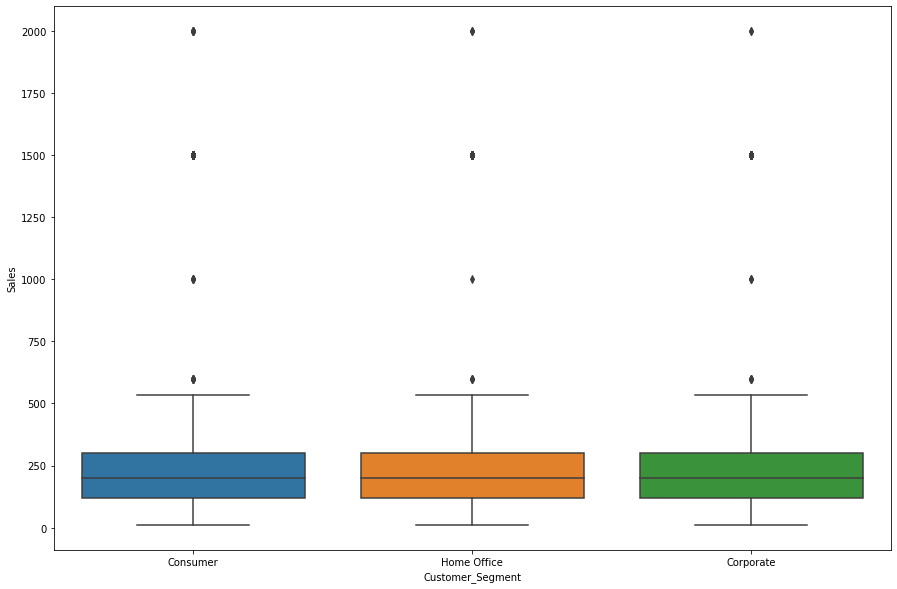

In [55]:
sns.boxplot(dfn.Customer_Segment,dfn.Sales)

Late_delivery_risk
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sales, dtype: object

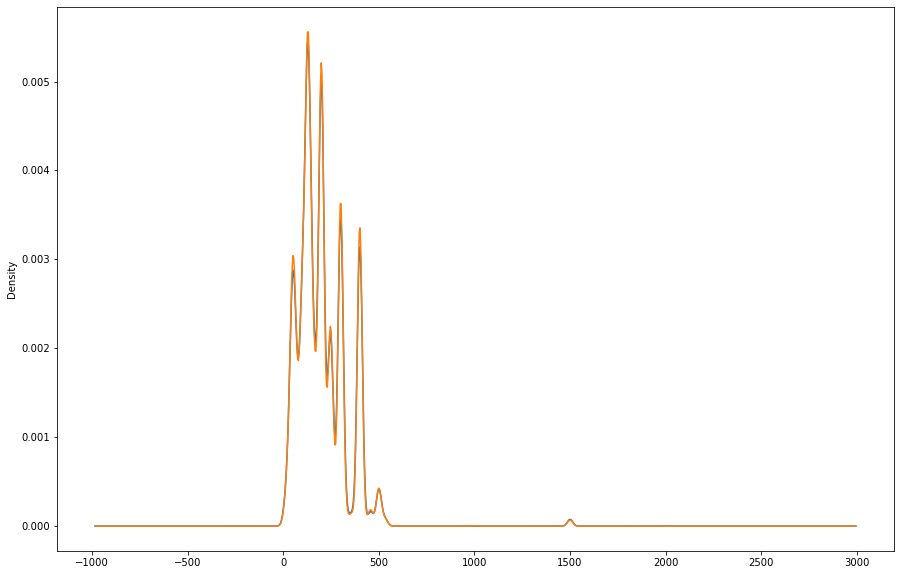

In [56]:
dfn.groupby('Late_delivery_risk')['Sales'].plot(kind='kde')

In [57]:
#same pattern for both : balanced

In [58]:
dfn.groupby('Late_delivery_risk')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Late_delivery_risk,,,,,,,,
0,81542.000000,204.291528,133.812912,9.990000,119.980003,199.919998,299.950012,1999.989990
1,98977.000000,203.344163,130.990019,9.990000,119.980003,199.919998,299.950012,1999.989990


## statistical test between numarical vs categorical (2 categories) -- Indpendent ttest 

In [59]:
#statistical test
st.ttest_ind(dfn[dfn['Late_delivery_risk']==0]['Sales'],dfn[dfn['Late_delivery_risk']==1]['Sales'])

Ttest_indResult(statistic=1.514409884334286, pvalue=0.12992366469657712)

In [60]:
#no impact on target :  insignificant (p_value>0.05)

In [61]:
dfn.groupby('Customer_Segment')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer_Segment,,,,,,,,
Consumer,93504.000000,204.224313,133.115125,9.990000,119.980003,199.919998,299.950012,1999.989990
Corporate,54789.000000,203.843962,131.736144,9.990000,119.980003,199.919998,299.950012,1999.989990
Home Office,32226.000000,202.337802,130.717979,9.990000,119.980003,199.919998,299.950012,1999.989990


## statistical test between numarical vs categorical (more  than 2 categories) - Anova test

In [62]:
#statical test --anova test beacuse more then 3 categories in categorical column
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [63]:
m1=ols('Sales~Customer_Segment',data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Customer_Segment,2.000000,85699.833601,42849.916801,2.449142,0.086370
Residual,180516.000000,3158287380.312264,17495.886128,NaN,NaN


In [64]:
#since p_value > 0.05 --> customer_segment is not signifant variable to influence sales

In [65]:
#no impact on target : insignificant

In [66]:
dfn.groupby('Department_Name')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Department_Name,,,,,,,,
Apparel,48998.000000,162.787366,75.610332,59.080002,129.990005,129.990005,179.970001,461.480011
Book Shop,405.000000,31.080000,0.000000,31.080000,31.080000,31.080000,31.080000,31.080000
Discs Shop,2026.000000,112.975187,94.375961,11.290000,39.750000,39.750000,164.380005,260.649994
Fan Shop,66861.000000,255.961935,108.840642,11.540000,199.990005,249.899994,399.980011,495.000000
Fitness,2479.000000,160.165749,121.428069,22.000000,69.980003,124.949997,239.960007,999.989990
Footwear,14525.000000,275.834683,158.669672,27.990000,120.000000,299.970001,399.959992,1999.989990
Golf,33220.000000,138.742572,68.758085,25.000000,79.980003,150.000000,200.000000,350.000000
Health and Beauty,362.000000,293.040009,0.000000,293.040008,293.040008,293.040008,293.040008,293.040008
Outdoors,9686.000000,129.398250,125.055090,9.990000,49.980000,95.970001,155.970001,599.989990


In [67]:
dfn.groupby('Department_Name')['Sales'].mean().sort_values(ascending=False)

Department_Name
Technology           709.623868
Health and Beauty    293.040008
Footwear             275.834683
Fan Shop             255.961935
Apparel              162.787366
Fitness              160.165749
Golf                 138.742572
Outdoors             129.398250
Discs Shop           112.975187
Pet Shop              84.400002
Book Shop             31.080000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Department_Name'>

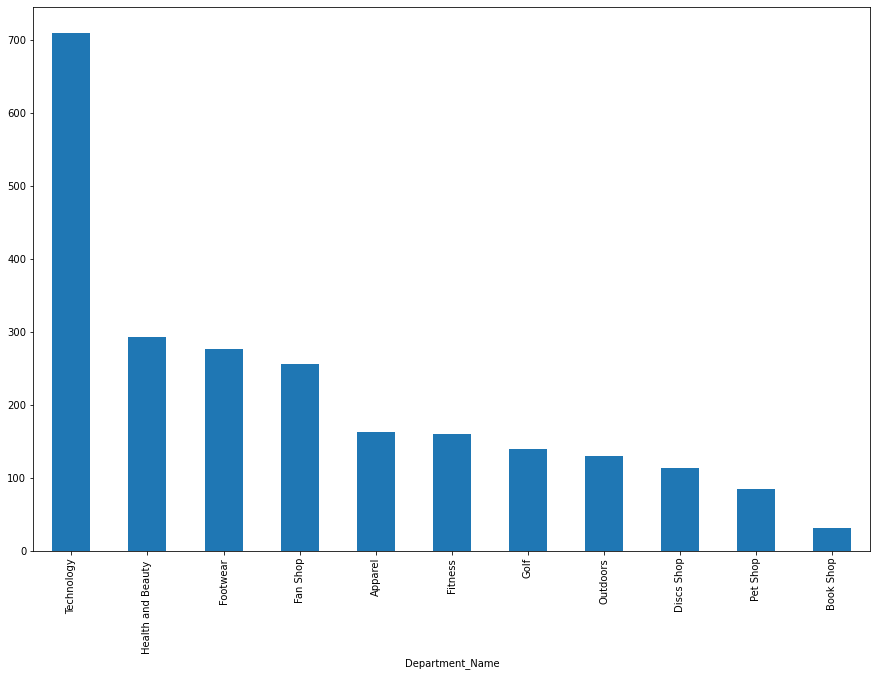

In [68]:
dfn.groupby('Department_Name')['Sales'].mean().sort_values(ascending=False).plot(kind='bar')

##### Statistical test : Anova test

In [69]:
m1=ols('Sales~Department_Name',data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Department_Name,10.000000,952170356.468660,95217035.646866,7790.506505,0.000000
Residual,180508.000000,2206202723.677402,12222.188067,NaN,NaN


In [70]:
#it has impact on target : significant (p_value < 0.05)
#Technology dept doing well in sales

In [71]:
dfn_cat.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Market', 'Order_City', 'Order_Country', 'Order_Item_Quantity', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'Shipping_Mode'], dtype='object')

### Type feature(ind) vs Sales (target)

In [72]:
dfn_cat['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [73]:
m1=ols('Sales~Type',data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Type,3.000000,81996.748867,27332.249622,1.562200,0.196242
Residual,180515.000000,3158291083.396976,17496.003564,NaN,NaN


In [ ]:
#it has no impact on target : insignificant (p_value > 0.05)
#Type of transaction not doing well in sales

### Days_for_shipping_ (real) (ind) vs Sales (target)

In [75]:
dfn_cat['Days_for_shipping_(real)'].value_counts()

2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days_for_shipping_(real), dtype: int64

In [108]:
dfn['Days_for_shipping_real']=dfn['Days_for_shipping_(real)']

In [109]:
m1=ols("Sales~Days_for_shipping_real",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Days_for_shipping_real,6.000000,292172.504229,48695.417372,2.783370,0.010453
Residual,180512.000000,3158080907.641586,17495.130006,NaN,NaN


In [ ]:
#significant feature (p_value < 0.05)

## Delivery_Status (ind) vs sales (target)

In [78]:
dfn_cat['Delivery_Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery_Status, dtype: int64

In [79]:
m1=ols("Sales~Delivery_Status",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Delivery_Status,3.000000,76977.789313,25659.263104,1.466576,0.221414
Residual,180515.000000,3158296102.356519,17496.031368,NaN,NaN


In [ ]:
#it has no impact on target : insignificant (p_value > 0.05)
#Delivery_Status not doing well in sales

### Category_Name (ind) vs sales (target)

In [81]:
dfn_cat['Category_Name'].value_counts()

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

In [82]:
m1=ols("Sales~Category_Name",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Category_Name,49.000000,2360259499.951165,48168561.223493,10891.848342,0.000000
Residual,180469.000000,798113580.194137,4422.441418,NaN,NaN


In [ ]:
#it has impact on target : significant (p_value < 0.05)
#Category_Name doing well in sales

### Customer_City (ind) vs sales (target)

In [84]:
dfn_cat['Customer_City'].value_counts()

Caguas         66770
Chicago         3885
Los Angeles     3417
Brooklyn        3412
New York        1816
               ...  
Bartlett          25
Malden            22
Ponce             22
Freehold          13
CA                 3
Name: Customer_City, Length: 563, dtype: int64

In [85]:
m1=ols("Sales~Customer_City",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Customer_City,562.000000,10054953.560558,17891.376442,1.022660,0.345984
Residual,179956.000000,3148318126.585278,17494.932798,NaN,NaN


In [ ]:
#no impact on sales (p_value > 0.05) : insignificant feature

### Customer_Country (ind) vs sales (target)

In [86]:
dfn_cat['Customer_Country'].value_counts()

EE. UU.        111146
Puerto Rico     69373
Name: Customer_Country, dtype: int64

In [87]:
#statistical test
st.ttest_ind(dfn[dfn['Customer_Country']=='EE. UU.']['Sales'],dfn[dfn['Customer_Country']=='Puerto Rico']['Sales'])

Ttest_indResult(statistic=-0.5106660222909017, pvalue=0.6095855611356886)

In [ ]:
#no impact on sales (p_value > 0.05) : insignificant feature

In [88]:
dfn_cat.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Market', 'Order_City', 'Order_Country', 'Order_Item_Quantity', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'Shipping_Mode'], dtype='object')

### Customer_Segment (ind) vs sales(target)

In [89]:
dfn_cat['Customer_Segment'].value_counts()

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer_Segment, dtype: int64

In [90]:
m1=ols("Sales~Customer_Segment",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Customer_Segment,2.000000,85699.833601,42849.916801,2.449142,0.086370
Residual,180516.000000,3158287380.312264,17495.886128,NaN,NaN


In [ ]:
#no impact on sales (p_value > 0.05) : insignificant feature

### Customer_State (ind) vs sales (target)

In [91]:
dfn_cat['Customer_State'].value_counts()

PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer_State, dtype: int64

In [92]:
m1=ols("Sales~Customer_State",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Customer_State,45.000000,712519.254143,15833.761203,0.904963,0.653572
Residual,180473.000000,3157660560.891697,17496.581543,NaN,NaN


In [ ]:
#no impact on sales (p_value > 0.05) : insignificant feature

### Customer_Street (ind) vs sales (target)

In [93]:
dfn_cat['Customer_Street'].value_counts()

9126 Wishing Expressway     122
4388 Burning Goose Ridge    117
4720 Noble Hills Wynd       116
2878 Hazy Wagon  Thicket    113
398 Emerald Grove           109
                           ... 
7676 Colonial Towers          1
6425 Thunder Impasse          1
376 Silver Terrace            1
5420 Rocky Port               1
8621 Broad Forest             1
Name: Customer_Street, Length: 7458, dtype: int64

### Market (ind) vs sales(target)

In [95]:
dfn_cat['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [96]:
m1=ols("Sales~Market",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Market,4.000000,11327986.626898,2831996.656724,162.442872,0.000000
Residual,180514.000000,3147045093.518917,17433.800667,NaN,NaN


In [ ]:
#significant feature (p_value < 0.05)

### Order_City (ind) vs sales (target)

In [97]:
dfn_cat['Order_City'].value_counts()

Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
                 ... 
Libourne            1
Bergerac            1
Juliaca             1
Takasaki            1
Pernik              1
Name: Order_City, Length: 3597, dtype: int64

m1=ols("Sales~Order_City",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

In [98]:
dfn_cat.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Delivery_Status', 'Late_delivery_risk', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Market', 'Order_City', 'Order_Country', 'Order_Item_Quantity', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'Shipping_Mode'], dtype='object')

### Order_Region (ind) vs sales (target)

In [99]:
dfn_cat['Order_Region'].value_counts()

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order_Region, dtype: int64

In [100]:
m1=ols("Sales~Order_Region",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Order_Region,22.000000,13380229.205539,608192.236615,34.905092,0.000000
Residual,180496.000000,3144992850.940301,17424.169239,NaN,NaN


In [ ]:
#significant feature (p_value < 0.05)

### Order_Status (ind) vs sales (target)

In [101]:
dfn_cat['Order_Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order_Status, dtype: int64

In [102]:
m1=ols("Sales~Order_Status",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Order_Status,8.000000,172100.496038,21512.562005,1.229571,0.276692
Residual,180510.000000,3158200979.649821,17495.989029,NaN,NaN


In [ ]:
#insignificant feature (p_value > 0.05)

### Shipping_Mode (ind) vs sales (target)

In [103]:
dfn_cat['Shipping_Mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping_Mode, dtype: int64

In [104]:
m1=ols("Sales~Shipping_Mode",data=dfn).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Shipping_Mode,3.000000,245767.696464,81922.565488,4.682602,0.002841
Residual,180515.000000,3158127312.449382,17495.096321,NaN,NaN


In [ ]:
#significant feature (p_value < 0.05)